In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising/advertising.csv


In [2]:
Data = pd.read_csv("/../kaggle/input/advertising/advertising.csv")
Data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
Data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
Data.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


In [6]:
Data.City.value_counts()

Williamsport         3
Lisamouth            3
Benjaminchester      2
Robertfurt           2
East John            2
                    ..
Lake Conniefurt      1
North Ricardotown    1
South Denisefurt     1
Lake Evantown        1
Lisafort             1
Name: City, Length: 969, dtype: int64

In [7]:
import seaborn as sns

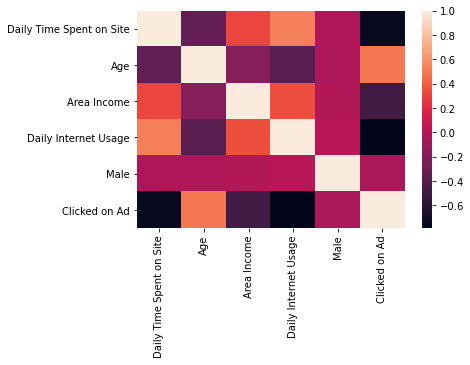

In [8]:
sns.heatmap(Data.corr());

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,auc,roc_curve,precision_score

In [10]:
X = Data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']]

In [11]:
y =Data['Clicked on Ad']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((700, 4), (300, 4), (700,), (300,))

**Base line Accuracy**

In [13]:
y.value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

In [14]:
model = LogisticRegression()

In [15]:
model.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [16]:
model.score(X_train,y_train)

0.9371428571428572

In [17]:
pred_test = model.predict(X_test)

In [18]:
accuracy_score(y_test,pred_test)

0.9633333333333334

In [19]:
pred_train = model.predict_proba(X_train)
pred_train[:]

array([[0.59035757, 0.40964243],
       [0.89065845, 0.10934155],
       [0.01481139, 0.98518861],
       ...,
       [0.70893485, 0.29106515],
       [0.92892433, 0.07107567],
       [0.01191309, 0.98808691]])

In [20]:
pred_train[:,1]

array([0.40964243, 0.10934155, 0.98518861, 0.11977051, 0.82666749,
       0.95564588, 0.13353101, 0.99268046, 0.98524593, 0.80416738,
       0.09387922, 0.12134081, 0.08397911, 0.87070999, 0.94714839,
       0.32317178, 0.83713215, 0.07588998, 0.19573473, 0.25545115,
       0.94465357, 0.80346876, 0.96206696, 0.14537424, 0.9656109 ,
       0.21613649, 0.98876718, 0.89914083, 0.96942939, 0.14119351,
       0.11891849, 0.99013026, 0.44151817, 0.10491228, 0.79305416,
       0.19680695, 0.87509473, 0.98396417, 0.94952956, 0.91221948,
       0.16397094, 0.70420104, 0.98901194, 0.94739013, 0.44104134,
       0.92891223, 0.79845099, 0.12555887, 0.08160926, 0.08730716,
       0.98787922, 0.26731229, 0.94892236, 0.1192423 , 0.84983488,
       0.07693865, 0.09614969, 0.97494693, 0.10430342, 0.87667032,
       0.07897668, 0.09709289, 0.92967129, 0.10123335, 0.10279193,
       0.98946843, 0.07968426, 0.71043302, 0.91313172, 0.46141422,
       0.4409911 , 0.85835198, 0.29236441, 0.0746522 , 0.78595

In [21]:
fpr,tpr,t = roc_curve(y_train,pred_train[:,1],pos_label=1)       

Text(0, 0.5, 'True Positive Rate (TPR)')

<Figure size 720x360 with 0 Axes>

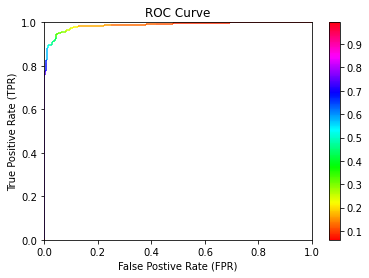

In [22]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib as npl
l1 = []
for i in range(len(fpr)-1):
    l1.append([(fpr[i],tpr[i]),(fpr[i+1],tpr[i+1])])
#print(l1)

lc = LineCollection(l1,cmap='hsv')
plt.figure(figsize=(10,5))
fig, ax = plt.subplots()
line=ax.add_collection(lc)
lc.set_array(t[1:])

plt.colorbar(line, ticks=np.arange(0,1,0.1))

plt.title('ROC Curve')
plt.xlabel('False Postive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

In [23]:
pred_test_prob = model.predict_proba(X_test)
pred_test_prob[:5]

array([[0.27649635, 0.72350365],
       [0.10792819, 0.89207181],
       [0.06789401, 0.93210599],
       [0.29024764, 0.70975236],
       [0.92099862, 0.07900138]])

In [24]:
pred_t_test = np.where(pred_test_prob[:,1]>=0.8,1,0)
pred_t_test

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [25]:
accuracy_score(y_test,pred_t_test)

0.8933333333333333